<h1>Different Metrics for CLASSIFICATION</h1>

When we have an equal number of positive and negative samples in a <b>binary classification</b> problem:<br>
<b>ACCURACY,<br>
    PRECISION,<br>
    RECALL<br>
    F1</b>.

<h2>Accuracy</h2>

Accuracy = Calculated y / True y

In [2]:
# From scratch
def accuracy(y_true, y_pred):
    correct_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter

In [4]:
# With sklearn
from sklearn import metrics
def accuracy_sk(y_true, y_pred):
    return metrics.accuracy_score(y_true, y_pred)

<h2>Accuracy Score</h2>

Accuracy Score = (TP + TN) / (TP + TN + FP + FN)

Correctly classified samples / Total samples

In [5]:
def acc_score_sk(y_true, y_pred):
    return metrics.accuracy_score(y_true, y_pred)

<h2>Precision</h2>

Precision = TP / (TP + FP)

TRUE POSITIVES<br>
out of<br>
ALL THE POSITIVE PREDICTIONS

<h2>True Positive Rate == Sensitivity == Recall</h2>

Recall = TP / (TP + FN)

TRUE POSITIVES<br>
out of <br>
ALL POSITIVE SAMPLES

<b>The rate at which POSITIVE samples are classified as POSITIVE.</b>

<h1>False Positive Rate</h1>

FPR = FP / (TN + FP)

FALSE POSITIVES
<br>out of<br>
ALL THE NEGATIVE SAMPLES

<b>The rate at which NEGATIVE samples are classified as POSITIVES.</b>

<h1> True Negative Rate</h1>

TNR = 1 - FPR

<h2>F1 Score</h2>

It is challenging to choose a value of threshold that gives both good precision and recall. <br>
Too high --> less TP and more FN, lower recall<br>
Too low --> more FP but lower precision

F1 = 2 * Precision * Recall / (Precision + Recall)

F1 = 2 * TP (2 * TP + FP + FN)

In [10]:
# Assuming precision and recall are defined
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    
    score = 2 * p * r / (p + r)
    
    return score

In [11]:
#metrics.f1_score(y_true, y_pred)

<br>
<br>

In [2]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and y_pred ==1:
            tp += 1
    return tp



def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp        

In [3]:
# empty lists
tp_list = []
fp_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities 
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3,
           0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# thresholds 
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for thresh in thresholds:
    # calculate predictions for each threshold
    temp_pred = [1 if x>=thresh else 0 for x in y_pred]
    
    # calculate tp and fp
    temp_tp = true_positive(y_true, y_pred)
    temp_fp = false_positive(y_true, y_pred)
    
    # append them to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [4]:
import pandas as pd

In [6]:
df_tp = pd.DataFrame(tp_list)
df_fp = pd.DataFrame(fp_list)
df_th = pd.DataFrame(thresholds)

col_names = ["Thresholds", "tp", "fp"]

In [42]:
new_df = pd.concat([df_th, df_tp, df_fp], axis=1, ignore_index=True)

In [46]:
new_df.columns = col_names

In [47]:
new_df

,Thresholds,tp,fp
0,0.00,0,0
1,0.10,0,0
2,0.20,0,0
3,0.30,0,0
4,0.40,0,0
5,0.50,0,0
6,0.60,0,0
7,0.70,0,0
8,0.80,0,0
9,0.85,0,0


# AUC ROC

y_axis = TPR<br>
x_axis = FPR

Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax
from chest x-ray images. This means that if you select a random image from your
dataset with pneumothorax (positive sample) and another random image without
pneumothorax (negative sample), then the pneumothorax image will rank higher
than a non-pneumothorax image with a probability of 0.85.

After computing AUCROC, choose threshold for making predictions.<br>
Most times, top-left-most value in graph is good threshold.

<br>

# CONFUSION MATRIX

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [50]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_true, y_pred)

Text(0.5, 16.5, 'Predicted Labels')

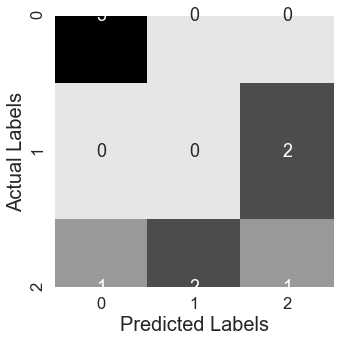

In [62]:
plt.figure(figsize=(5,5))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

plt.ylabel("Actual Labels", fontsize=20)
plt.xlabel("Predicted Labels", fontsize=20)

<br><br><br><br><br>

# REGRESSION 

<h1>Mean Absolute Error (MAE)</h1>

In [63]:
import numpy as np

In [64]:
def mae(y_true, y_pred):
    error = 0
    for ty, yp in zip(y_true, y_pred):
        error += np.abs(yt-yp)
    return error / len(y_true)

<h1>Mean Squared Error (MSE)</h1>

In [65]:
def mse(y_true, y_pred):
    error = 0 
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) ** 2
    return error / len(y_true)

In [66]:
# RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

<h1>Mean Squared Log Error (MSLE)</h1>

In [68]:
def msle(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    return error / len(y_true)

In [71]:
# RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(y_true, y_pred)

<h1>R^2</h1>

In [ ]:
def r2(y_true, y_pred):
    mean_true_value = np.mean(y_true)
    
    numerator = 0
    denominator = 0
    
    for yt, yp in zip(y_true, y_pred):
        numerator += (yt - yp) ** 2
        denominator += (yt - mean_true_value) ** 2
    
    return 1 - (numerator / denominator)